# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [216]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [218]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [149]:
#município residencia latitude, qtd. de gestações anteriores, semana de gestação
sinasc_1= sinasc_raw[['munResLat', 'QTDGESTANT', 'SEMAGESTAC']] 

In [150]:
#mun residencia área, qtd de partos cesáreos, qtd. partos normais
sinasc_2=sinasc_raw[['munResArea', 'QTDPARTCES', 'QTDPARTNOR']] 

In [151]:
#mun residência altitude, qtd. de filho vivo, qtd. filho morto
sinasc_3=sinasc_raw[['munResAlt', 'QTDFILVIVO', 'QTDFILMORT']]

In [152]:
#idade da mãe, município de residência, data de nascimento do bebe
sinasc_4= sinasc_raw[['IDADEMAE', 'munResNome', 'DTNASC']]

In [207]:
sinasc_6= sinasc_raw[['munResNome',  'QTDFILVIVO', 'QTDFILMORT']]

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [153]:
#observação de máximo e mínimo para criação das faixas
sinasc_1.munResLat.describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [154]:
#cortando a variável latitude em duas faixas.
pd.cut(sinasc_1['munResLat'], [-13.5, -10.5, -8.7]).value_counts()

(-10.5, -8.7]     14034
(-13.5, -10.5]    12993
Name: munResLat, dtype: int64

In [155]:
#atribuindo o corte de faixa de latitude à variável munResLat:
munResLat= pd.cut(sinasc_1['munResLat'], [-13.5, -10.5, -8.7])

In [156]:
#criando uma função que traz a faixa de corte como índice e as demais variáveis númericas como coluna, aplicando a elas diversas operações.
def operacoes (df, column1:object, column2:object, var:str):
    return df[[column1, column2]].groupby(var).aggregate(['min', 'mean', np.median, 'std', 'var', max, sum])

In [219]:
operacoes(sinasc_1, column1='QTDGESTANT', column2='SEMAGESTAC', var= munResLat)

QTDGESTANT                                                      \
                      min      mean median       std       var   max      sum   
munResLat                                                                       
(-13.5, -10.5]        0.0  1.186032    1.0  1.304777  1.702444  15.0  15301.0   
(-10.5, -8.7]         0.0  1.364024    1.0  1.492482  2.227501  52.0  17615.0   

               SEMAGESTAC                                              \
                      min       mean median       std       var   max   
munResLat                                                               
(-13.5, -10.5]       19.0  38.545360   39.0  2.012435  4.049895  45.0   
(-10.5, -8.7]        21.0  38.588302   39.0  2.020722  4.083319  45.0   

                          
                     sum  
munResLat                 
(-13.5, -10.5]  482665.0  
(-10.5, -8.7]   511951.0

O df exibido pela função acima, nos retorna que:
- O número máximo de filhos em latitude (-10.5,-8,7) é muito superior ao número máximo da latitude inferior, entretanto, a variância também é maior. Já em relação à semana de gestação, os valores são bem próximos para as duas faixas de latitude criadas. 

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [158]:
sinasc_2.head()

,munResArea,QTDPARTCES,QTDPARTNOR
0,7067.025,0.0,0.0
1,7067.025,1.0,0.0
2,7067.025,1.0,1.0
3,3958.273,0.0,0.0
4,7067.025,1.0,0.0


In [159]:
#criando duas faixas. 
munResArea= pd.cut(sinasc_2['munResArea'], [459, 3000, 34097])

In [160]:
#visualizando a quantidade de valores em cada faixa:
munResArea.value_counts()

(3000, 34097]    21808
(459, 3000]       5219
Name: munResArea, dtype: int64

In [161]:
operacoes(sinasc_2, column1='QTDPARTCES', column2='QTDPARTNOR', var= munResArea)

QTDPARTCES                                                      \
                     min      mean median       std       var   max      sum   
munResArea                                                                     
(459, 3000]          0.0  0.572981    0.0  0.749368  0.561553   5.0   2952.0   
(3000, 34097]        0.0  0.507070    0.0  0.744981  0.554997  12.0  10184.0   

              QTDPARTNOR                                                      
                     min      mean median       std       var   max      sum  
munResArea                                                                    
(459, 3000]          0.0  0.371334    0.0  0.856441  0.733490  10.0   1912.0  
(3000, 34097]        0.0  0.632982    0.0  1.278932  1.635668  41.0  12659.0

Acima podemos ver que em municípios com áreas menores há uma tendência maior a ter partos cesáreos do que normais, já no caso de cidades maiores é ao contrário. 

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [162]:
sinasc_3.head()

,munResAlt,QTDFILVIVO,QTDFILMORT
0,338.0,0.0,0.0
1,338.0,1.0,0.0
2,338.0,2.0,0.0
3,397.0,0.0,0.0
4,338.0,1.0,0.0


In [163]:
sinasc_3.munResAlt.describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [164]:
#separação de acordo com os quartis:
munResAlt= pd.cut(sinasc_3['munResAlt'], [85, 87, 153, 191, 595])

In [165]:
munResAlt.value_counts()

(85, 87]      8437
(153, 191]    6938
(191, 595]    6467
(87, 153]     4848
Name: munResAlt, dtype: int64

In [166]:
operacoes(sinasc_3, column1='QTDFILVIVO', column2='QTDFILMORT', var= munResAlt)

QTDFILVIVO                                                     \
                  min      mean median       std       var   max     sum   
munResAlt                                                                  
(85, 87]          0.0  1.167236    1.0  1.222640  1.494849  12.0  8543.0   
(87, 153]         0.0  1.189225    1.0  1.319208  1.740309  14.0  5430.0   
(153, 191]        0.0  0.922608    1.0  1.041525  1.084773   9.0  6354.0   
(191, 595]        0.0  0.950784    1.0  1.079861  1.166099  30.0  6066.0   

           QTDFILMORT                                                     
                  min      mean median       std       var   max     sum  
munResAlt                                                                 
(85, 87]          0.0  0.309770    0.0  0.644580  0.415483   9.0  2191.0  
(87, 153]         0.0  0.284860    0.0  0.639574  0.409055   9.0  1238.0  
(153, 191]        0.0  0.230949    0.0  0.534301  0.285477   5.0  1585.0  
(191, 595]        0.0  0.242281    0.0  0.638724  0.407968  28.0  1538.0

Acima podemos ver que o número máximo, tanto de filhos vivos como mortos, se encontra na maior latitude, (191, 595], e esse número máximo é muito superior ao máximo das demais categorias, mesmo com a variância muito próxima. 

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [167]:
imediatas_ro= {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [168]:
sinasc_4['Imediatas']=sinasc_4['munResNome'].map(imediatas_ro)

/tmp/ipykernel_4485/1453599304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['Imediatas']=sinasc_4['munResNome'].map(imediatas_ro)


In [169]:
#excluindo a coluna munResNome, para que fique apenas as imediatas, axis=0 excluir linhas, axis=1 excluir colunas
sinasc_5=sinasc_4.drop('munResNome', axis=1)

Abaixo primeiro aplica-se o filtro para encontrar a região imediata pretendidada e, em seguida, agrupa-se pela data de nascimento e a média de idade das mães para cada data:

In [170]:
cacoal=sinasc_5[sinasc_5["Imediatas"] == "Cacoal"].groupby('DTNASC')['IDADEMAE'].mean()

In [171]:
vilhena=sinasc_5[sinasc_5["Imediatas"] == "Vilhena"].groupby('DTNASC')['IDADEMAE'].mean()

In [172]:
jaru=sinasc_5[sinasc_5["Imediatas"] == "Jaru"].groupby('DTNASC')['IDADEMAE'].mean()

In [173]:
ariquemes=sinasc_5[sinasc_5["Imediatas"] == "Ariquemes"].groupby('DTNASC')['IDADEMAE'].mean()

In [174]:
porto_velho=sinasc_5[sinasc_5["Imediatas"] == "Porto Velho"].groupby('DTNASC')['IDADEMAE'].mean()

In [175]:
ji_parana= sinasc_5[sinasc_5["Imediatas"] == "Ji-Paraná"].groupby('DTNASC')['IDADEMAE'].mean()

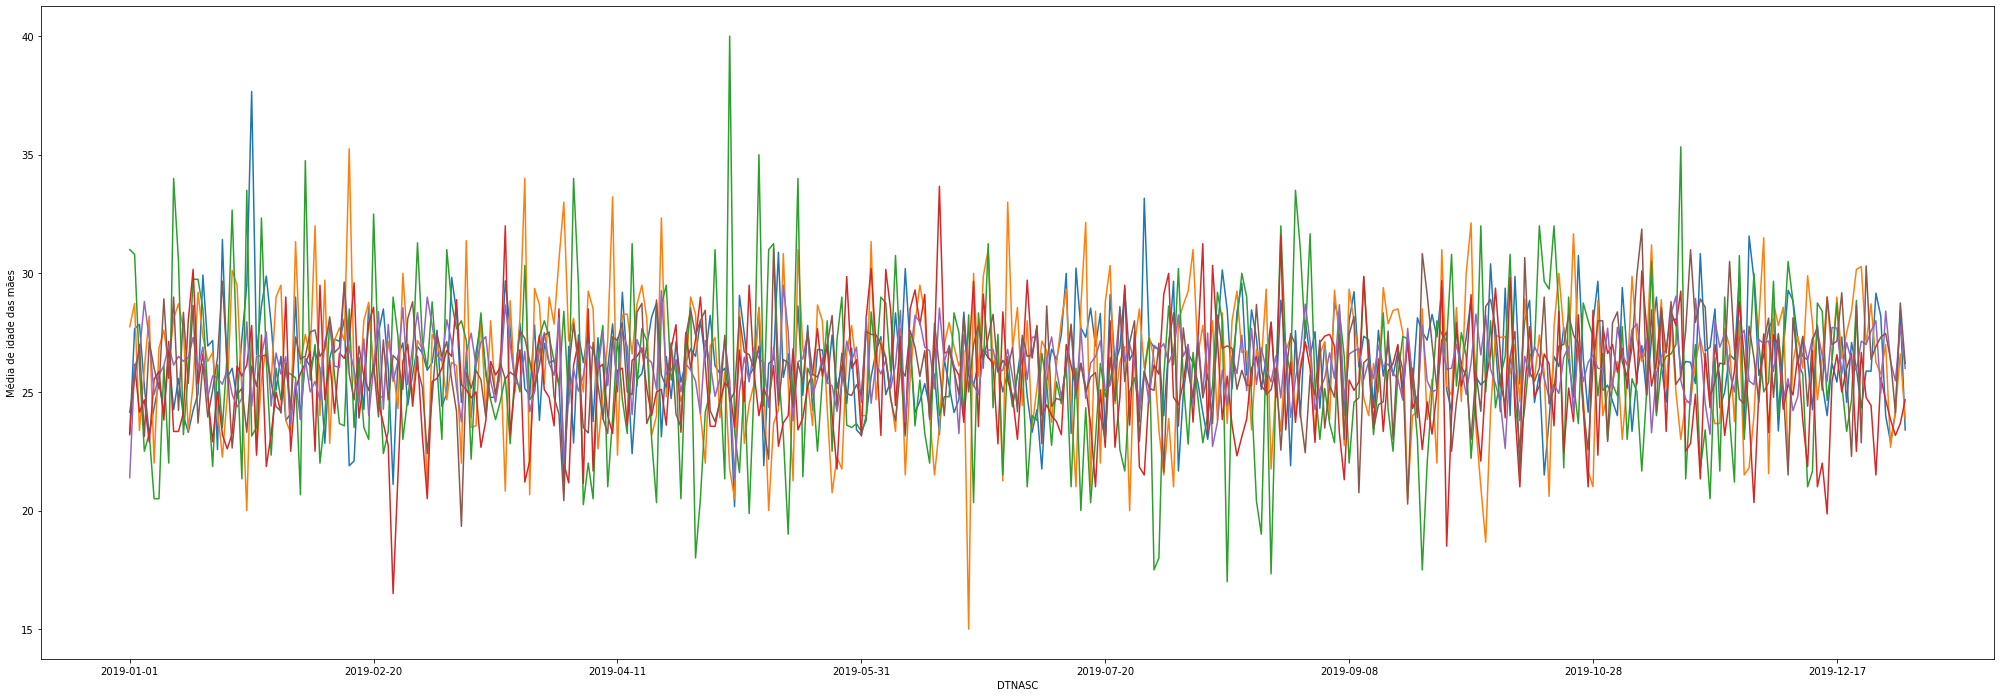

In [176]:
cacoal.plot(figsize=[35,12])
vilhena.plot()
jaru.plot()
ariquemes.plot()
porto_velho.plot()
ji_parana.plot()
plt.ylabel('Média de idade das mães');

Regiões imediatas:

* Cacoal= azul
* Vilhena= laranja
* Jaru= verde
* Ariquemes= vermelho
* Porto Velho= roxo
* Jí-Paraná= marrom

O gráfico nos mostra que durante todo o ano a faixa de idade média se concentra principalmente entre 20 e 30 anos. A máxima idade média foi atingida pela região de Jaru e a mínima pela região de Vilhena. 

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [200]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=',', encoding='UTF-8')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['Imediatas']))

In [202]:
dados_ro.groupby('Imediatas').mean()

,idh,ifdm,pib
Imediatas,,,
Ariquemes,630.500000,0.602175,5.837865e+05
Cacoal,655.928571,0.616614,5.078472e+05
Jaru,610.800000,0.548980,5.055452e+05
Ji-Paraná,636.769231,0.610092,5.521271e+05
Porto Velho,648.600000,0.599680,4.002284e+06
Vilhena,669.714286,0.642686,6.059301e+05


   No DataFrame acima podemos perceber que Vilhena é a 'melhor' região de Rondônia para se viver. Ela apresenta os mais altos índices de IDH, IFDM, contando também com o maior PIB do estado.
    Em segundo melhor lugar de Rondônia para se viver temos a região de Cacoal, que apresenta o segundo maior índice de desenvolvimento humano e o segundo maior índice de desenvolvimento municipal, que volta o olhar para a esfera social, economica e humana. 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

ANALISANDO A IDADE MÉDIA DAS MÃES DE ACORDO COM OS ÍNDÍCES:

In [203]:
idademae_media_regiao= sinasc_5.groupby('Imediatas').mean()

In [204]:
idademae_media_regiao

,IDADEMAE
Imediatas,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


In [205]:
indices=dados_ro.groupby('Imediatas').mean()

In [220]:
indices

,idh,ifdm,pib
Imediatas,,,
Ariquemes,630.500000,0.602175,5.837865e+05
Cacoal,655.928571,0.616614,5.078472e+05
Jaru,610.800000,0.548980,5.055452e+05
Ji-Paraná,636.769231,0.610092,5.521271e+05
Porto Velho,648.600000,0.599680,4.002284e+06
Vilhena,669.714286,0.642686,6.059301e+05


In [ ]:
#unindo a tabela indice e idademae_media_regiao
indices.merge(idademae_media_regiao, on='Imediatas', how='right')

Analisando a tabela acima, conseguimos perceber que a idade média das mães está diretamente ligada ao índice de Desenvolvimento Humano, visto que, até a quarta posição, as maiores idades caminham com os maiores IDH's, em ordem.

    Maior IDH- maior idade;
    Segundo maior IDH- segunda maior idade;
    Terceiro maior IDH- terceira maior idade;
    Quarto maior IDH- quarta maior idade; 